In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

## Function to calculate azimuth between 2 points

In [3]:
def calc_az_simple(x1,y1,x2,y2):
    theta = np.arctan2(x1 - x2,y1 - y2)
    if theta < 0:
        theta += 2*np.pi
    return theta

In [4]:
# define some test source locations other than shot A to make sure the orientation factors are correct
source = np.array([647966.931,906144.14])
source1 = np.array([647000.0,905000.00])
source2 = np.array([649000.0,905000.00])
sources = np.array(([647966.931,906144.14],[647000.0,905000.00],[649000.0,905000.00]))
# Read in the DAS stations
stations06 = pd.read_csv('/home/spri902/explosions/shotA_channel_map/H2.csv')
stationsP = pd.read_csv('/home/spri902/explosions/shotA_channel_map/H1.csv')
cols = list(stations06.columns[4:9:2])
stations06 = stations06[cols]
stationsP = stationsP[cols]
stations = pd.concat((stationsP,stations06)) # station order: starts at entrance to P main going back to A cavity
cable = ['H1','H2']
# Channels and distances 
start_chan = np.array((stations.iloc[0,0],stations.iloc[0,1],stations.iloc[0,2])) # first station at entrance to Pmain
last_chan = np.array((stations.iloc[-1,0],stations.iloc[-1,1],stations.iloc[-1,2])) # last station closest to A
doffsets = []
for i in range(len(stations)):
    doffsets.append(np.linalg.norm((start_chan-stations.iloc[i,:])))
doffsets = np.array(doffsets)

In [5]:
theta = np.zeros((len(stations),sources.shape[0]))
for i in range(len(stations)):
    # theta.append(calc_az(source[0],source[1],stations.iloc[i,0],stations.iloc[i,1],point_type='Cartesian'))
    theta[i,0] = calc_az_simple(sources[0,0],sources[0,1],stations.iloc[i,0],stations.iloc[i,1])
    theta[i,1] = calc_az_simple(sources[1,0],sources[1,1],stations.iloc[i,0],stations.iloc[i,1])
    theta[i,2] = calc_az_simple(sources[2,0],sources[2,1],stations.iloc[i,0],stations.iloc[i,1])

radial = np.cos(theta) ** 2
tangent = np.sin(theta) * np.cos(theta)

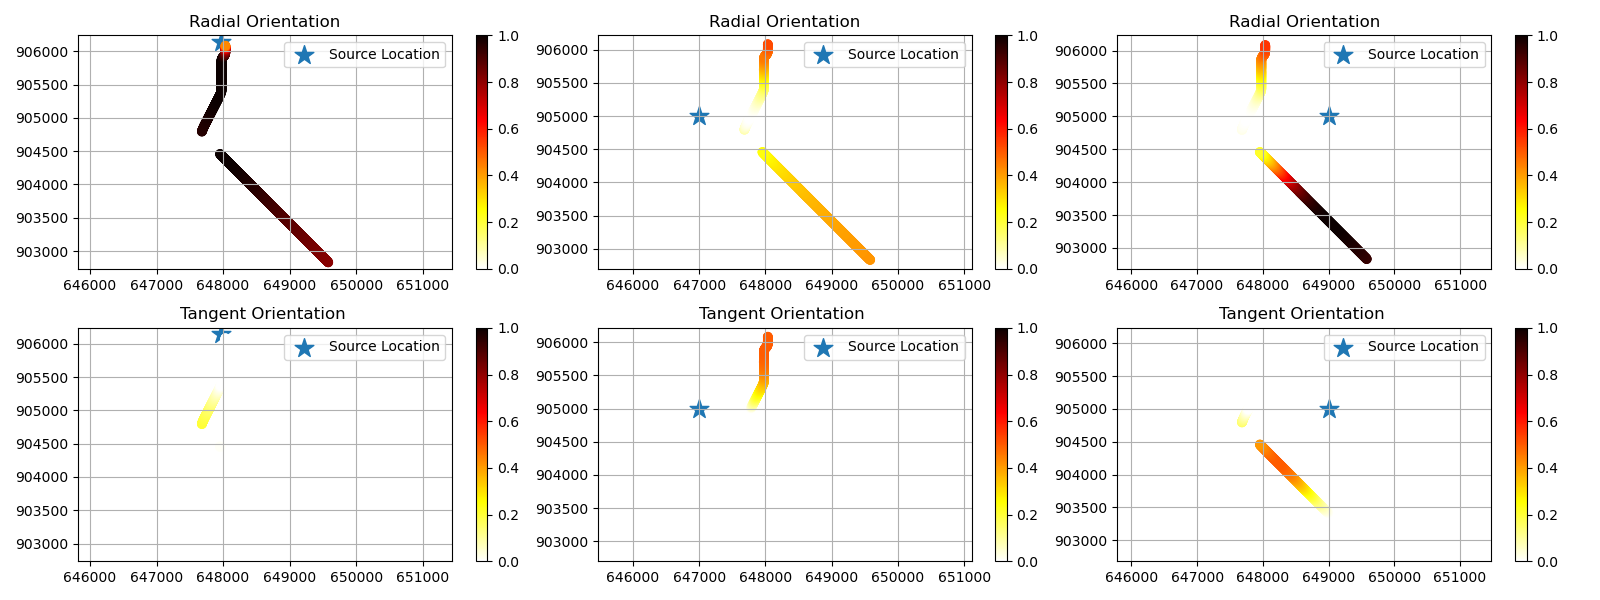

In [6]:
fig,ax=plt.subplots(2,3,figsize=(16,6))
for i in range(3):
    ax[0,i].scatter(sources[i,0],sources[i,1],marker='*',s=200,label='Source Location')
    im=ax[0,i].scatter(stations.iloc[:,0],stations.iloc[:,1],c=radial[:,i],cmap='hot_r',vmin=0,vmax=1)
    ax[0,i].axis('equal')
    ax[0,i].grid('on')
    ax[0,i].legend()
    ax[0,i].set_title('Radial Orientation')
    fig.colorbar(im)
    fig.tight_layout()

    ax[1,i].scatter(sources[i,0],sources[i,1],marker='*',s=200,label='Source Location')
    im=ax[1,i].scatter(stations.iloc[:,0],stations.iloc[:,1],c=tangent[:,i],cmap='hot_r',vmin=0,vmax=1)
    ax[1,i].axis('equal')
    ax[1,i].grid('on')
    ax[1,i].legend()
    ax[1,i].set_title('Tangent Orientation ')
    fig.colorbar(im)
    fig.tight_layout()

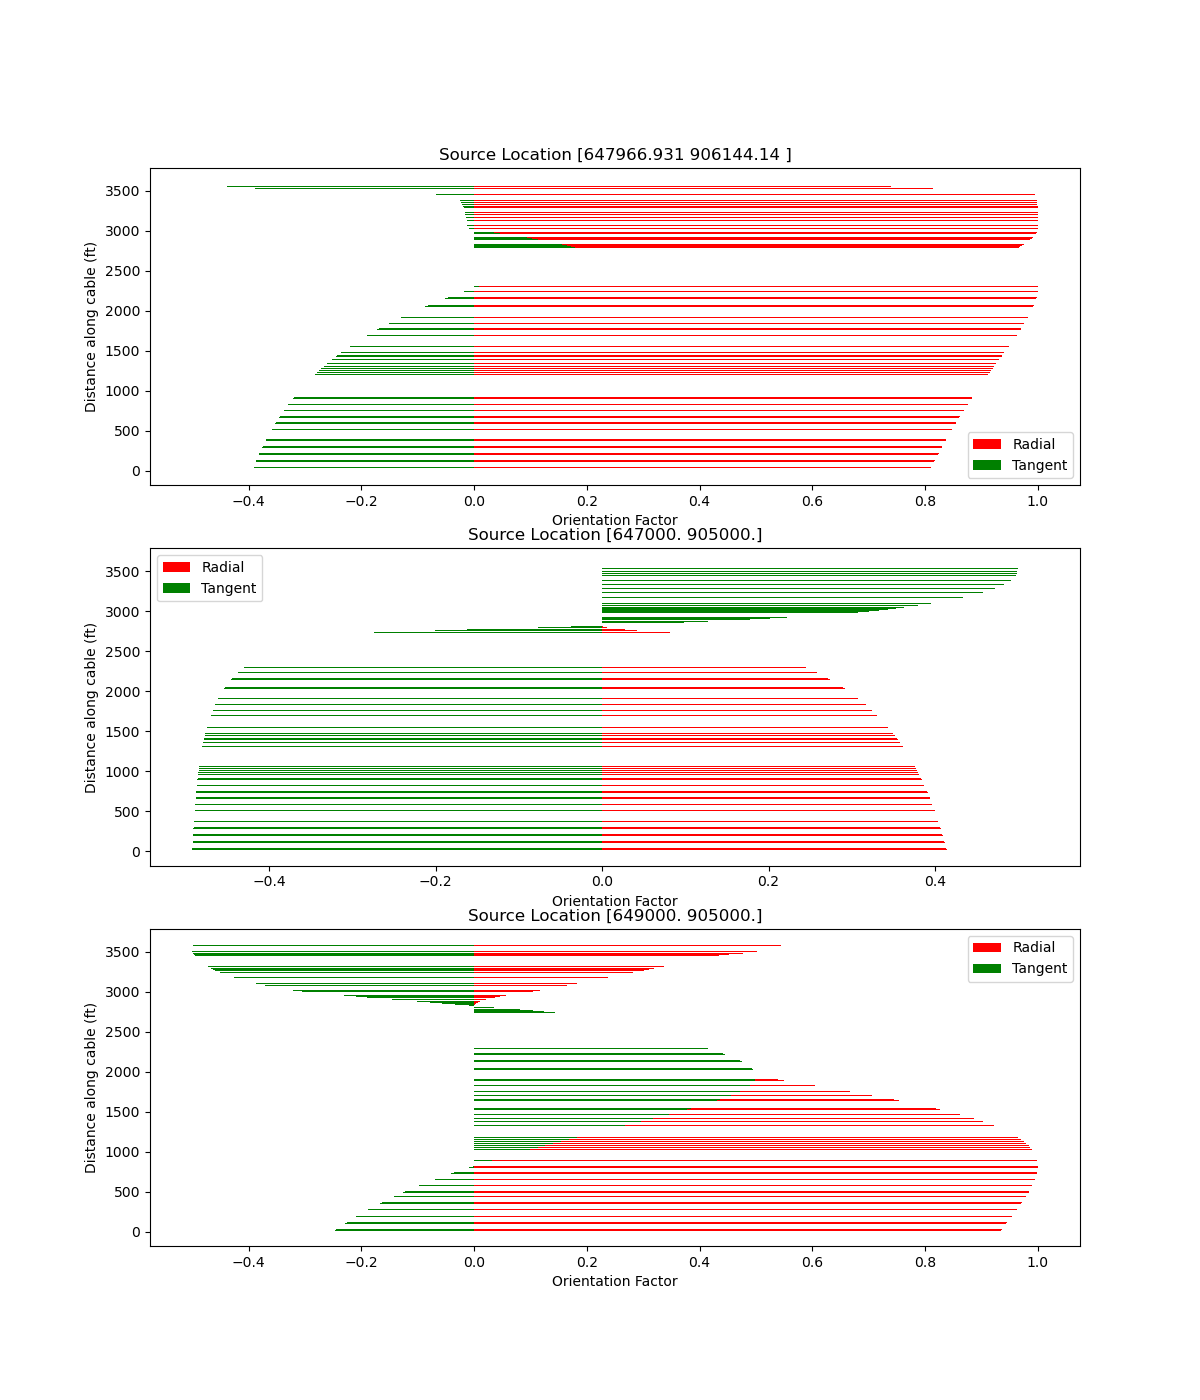

In [9]:
fig,ax = plt.subplots(3,1,sharey=True,figsize=(12,14))
for i in range(3):
    ax[i].barh(doffsets,radial[:,i],color='red',label='Radial')
    ax[i].barh(doffsets,tangent[:,i],color='green',label='Tangent')
    ax[i].set_title(f'Source Location {sources[i]}')
    ax[i].set_xlabel('Orientation Factor')
    ax[i].set_ylabel('Distance along cable (ft)')
    ax[i].legend()